In [2]:
from pyforest import*
lazy_imports()

['import plotly.express as px',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.linear_model import RidgeCV',
 'import fbprophet',
 'import numpy as np',
 'import sys',
 'import bokeh',
 'import lightgbm as lgb',
 'from sklearn.impute import SimpleImputer',
 'import os',
 'from openpyxl import load_workbook',
 'import statsmodels.api as sm',
 'import fastai',
 'import textblob',
 'from sklearn.linear_model import Lasso',
 'import datetime as dt',
 'from sklearn.model_selection import KFold',
 'from xlrd import open_workbook',
 'from sklearn.preprocessing import OneHotEncoder',
 'from PIL import Image',
 'from sklearn.linear_model import LogisticRegression',
 'import cv2',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn.preprocessing import RobustScaler',
 'from sklearn.model_selection import cross_val_score',
 'import torch',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.ensemble import RandomForestClassifier',
 'from s

In [4]:
df =pd.read_csv("pima-indians-diabetes.csv")

<IPython.core.display.Javascript object>

In [5]:
df.head()

preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

In [6]:
df.shape

(768, 9)

In [8]:
df.describe().T

count        mean         std     min       25%       50%        75%  \
preg   768.0    3.845052    3.369578   0.000   1.00000    3.0000    6.00000   
plas   768.0  120.894531   31.972618   0.000  99.00000  117.0000  140.25000   
pres   768.0   69.105469   19.355807   0.000  62.00000   72.0000   80.00000   
skin   768.0   20.536458   15.952218   0.000   0.00000   23.0000   32.00000   
test   768.0   79.799479  115.244002   0.000   0.00000   30.5000  127.25000   
mass   768.0   31.992578    7.884160   0.000  27.30000   32.0000   36.60000   
pedi   768.0    0.471876    0.331329   0.078   0.24375    0.3725    0.62625   
age    768.0   33.240885   11.760232  21.000  24.00000   29.0000   41.00000   
class  768.0    0.348958    0.476951   0.000   0.00000    0.0000    1.00000   

          max  
preg    17.00  
plas   199.00  
pres   122.00  
skin    99.00  
test   846.00  
mass    67.10  
pedi     2.42  
age     81.00  
class    1.00

In [11]:
df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [12]:
df.isnull().values.any()

False

In [13]:
df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [20]:
df.isnull().values.any()

False

In [22]:
df.isnull().values.sum()

0

In [26]:
df.isna().values.any()

False

<IPython.core.display.Javascript object>

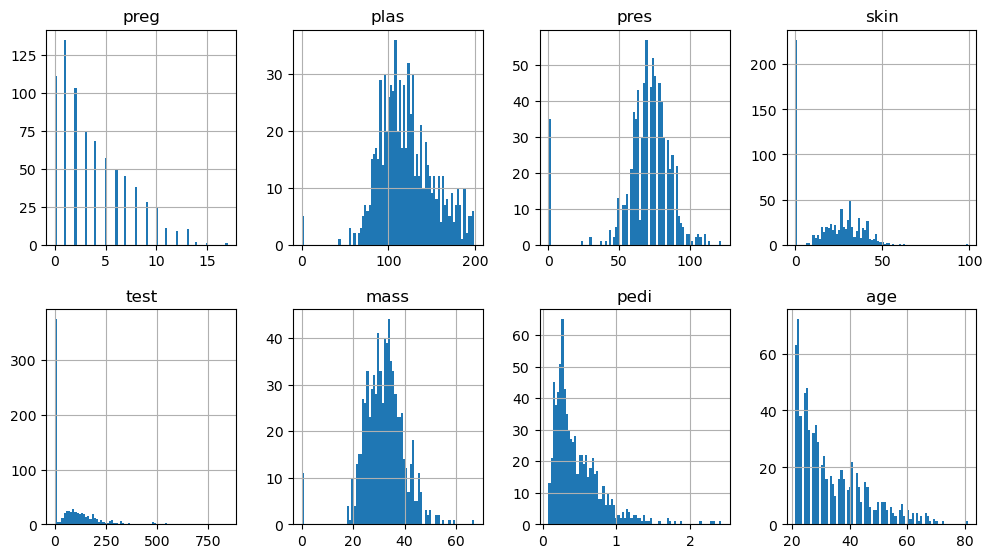

In [31]:
columns =list(df)[0:-1]
df[columns].hist(bins=80, figsize=(12,50), layout=(14,4))
plt.show()

## Identify correlation in data

In [33]:
df.corr()

preg      plas      pres      skin      test      mass      pedi  \
preg   1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523   
plas   0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337   
pres   0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265   
skin  -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928   
test  -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071   
mass   0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647   
pedi  -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000   
age    0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561   
class  0.221898  0.466581  0.065068  0.074752  0.130548  0.292695  0.173844   

            age     class  
preg   0.544341  0.221898  
plas   0.263514  0.466581  
pres   0.239528  0.065068  
skin  -0.113970  0.074752  
test  -0.042163  0.130548  
mass   0.036242  0.292695  
pedi   0.033561  0.173844  
age    1.000000  0.238356  
class  0.238356  1.000000

In [34]:
df['preg'].corr(df['pres'])

0.1412819774071399

## correlation heatmap

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

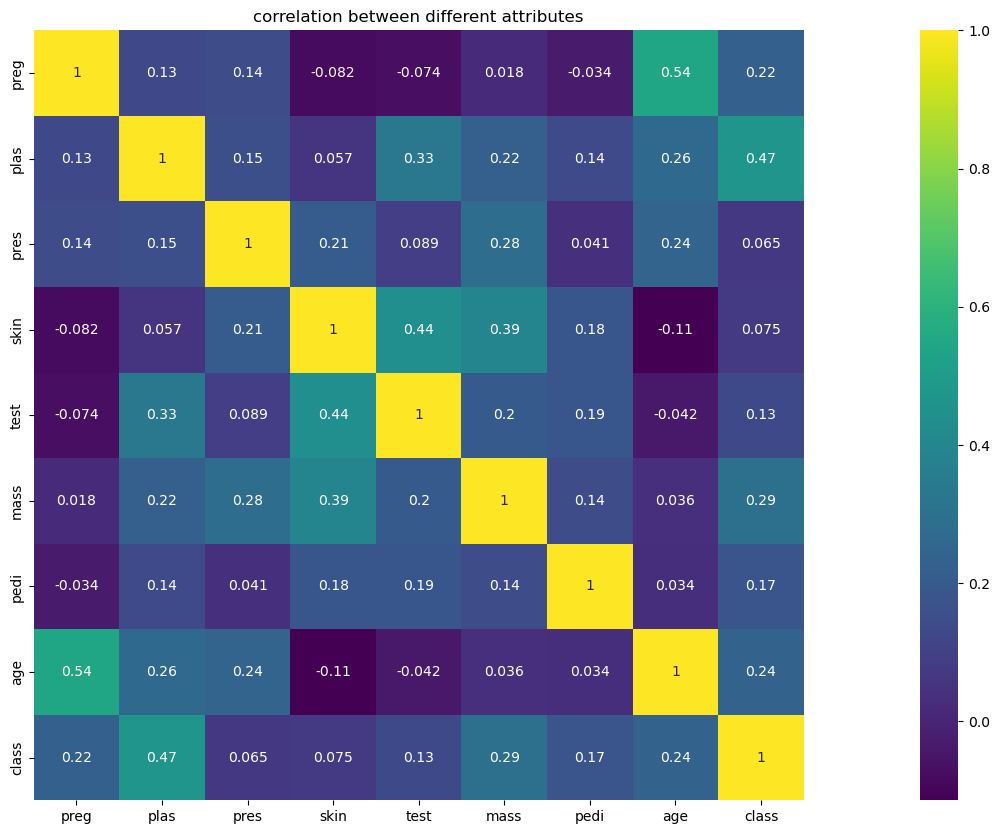

In [39]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(),vmax =1, square=True,cmap='viridis', annot=True)
plt.title('correlation between different attributes')
plt.show()


### pair plot

<IPython.core.display.Javascript object>

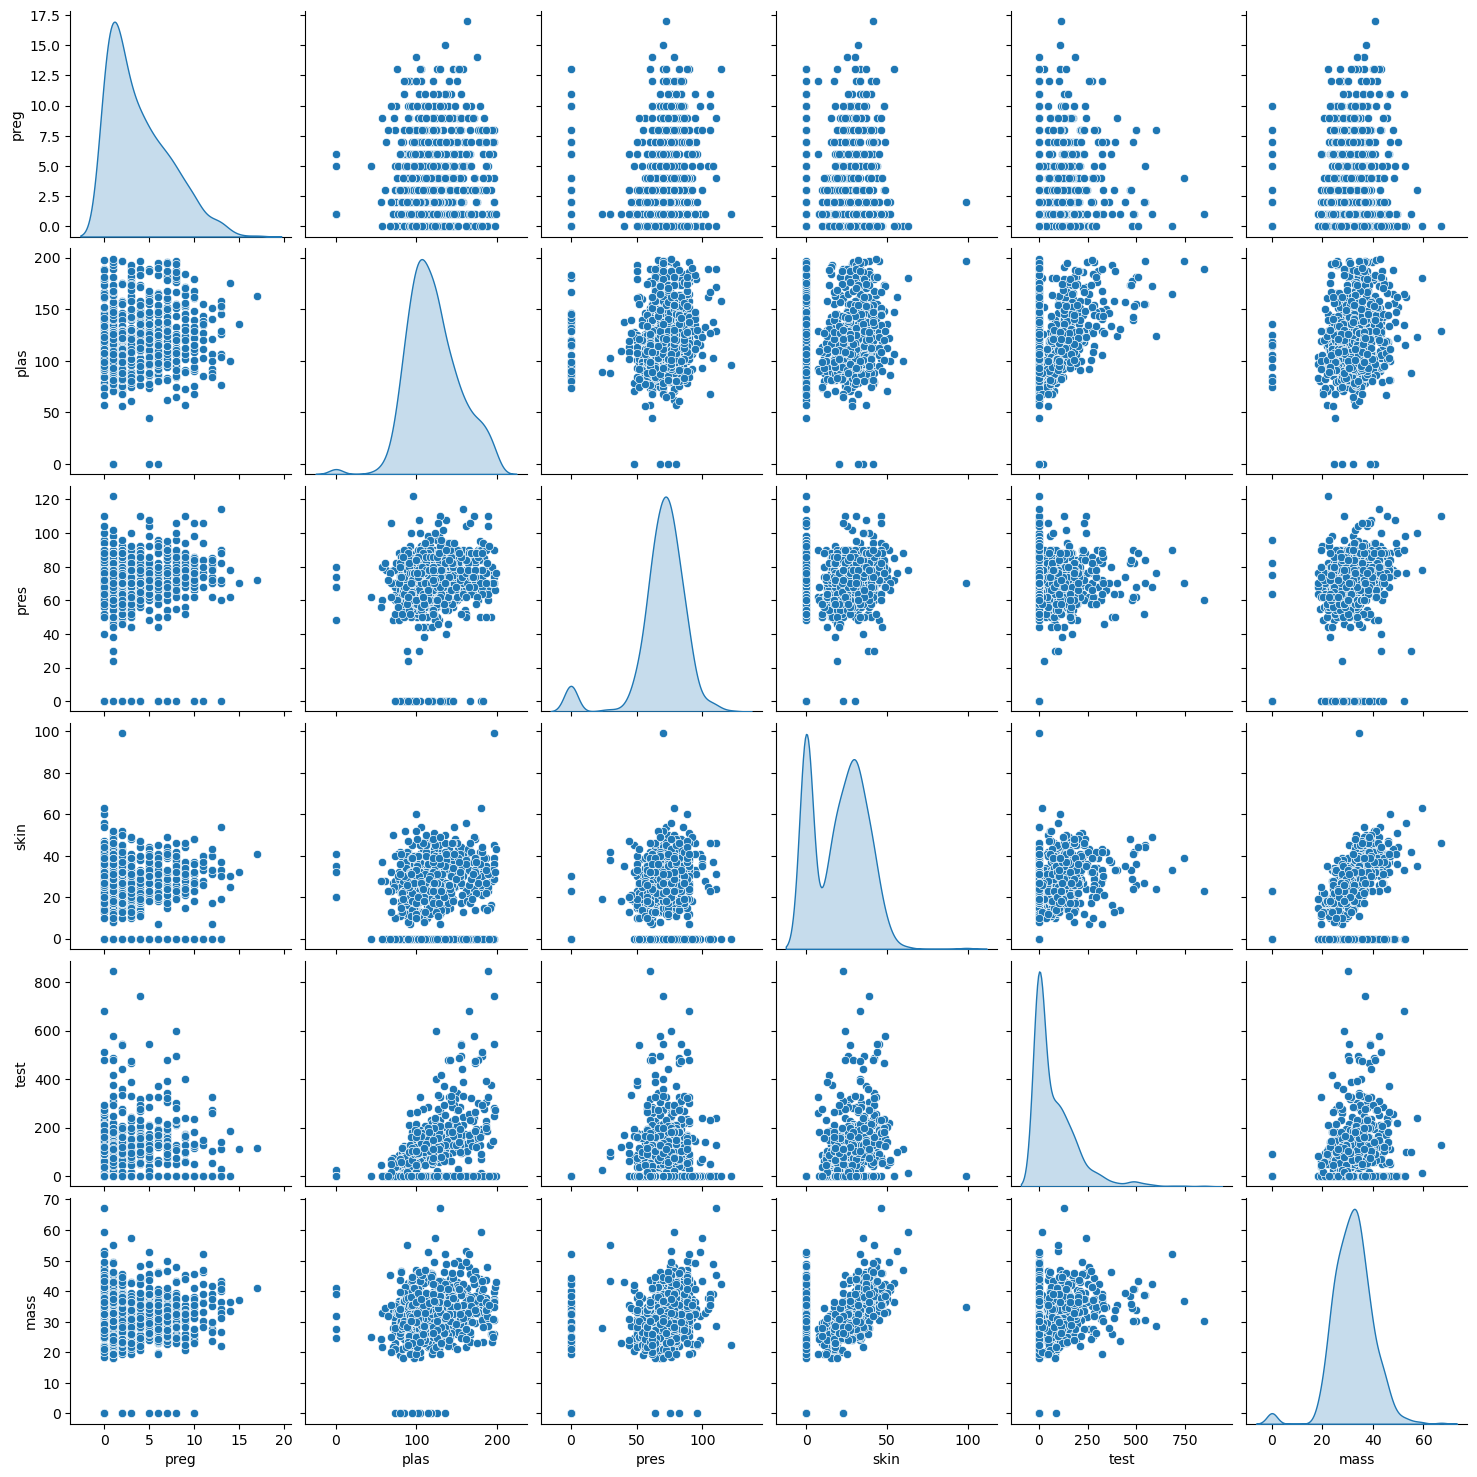

In [45]:
attr_select =df.iloc[:, 0:6]
sns.pairplot(attr_select, diag_kind ='kde')

## splitting the data

In [65]:
#we use 70% for training and 30% for testing
from sklearn.model_selection import train_test_split
x=df.drop('class', axis=1)
y =df['class']
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=.3, random_state=1)


In [66]:
x_train

preg  plas  pres  skin  test  mass   pedi  age
88     15   136    70    32   110  37.1  0.153   43
467     0    97    64    36   100  36.8  0.600   25
550     1   116    70    28     0  27.4  0.204   21
147     2   106    64    35   119  30.5  1.400   34
481     0   123    88    37     0  35.2  0.197   29
..    ...   ...   ...   ...   ...   ...    ...  ...
645     2   157    74    35   440  39.4  0.134   30
715     7   187    50    33   392  33.9  0.826   34
72     13   126    90     0     0  43.4  0.583   42
235     4   171    72     0     0  43.6  0.479   26
37      9   102    76    37     0  32.9  0.665   46

[537 rows x 8 columns]

In [67]:
y_train.shape

(537,)

In [53]:
x_train.shape

(537, 8)

In [55]:
x_test.shape

(231,)

## Data preparation

In [68]:
x_train.head()

preg  plas  pres  skin  test  mass   pedi  age
88     15   136    70    32   110  37.1  0.153   43
467     0    97    64    36   100  36.8  0.600   25
550     1   116    70    28     0  27.4  0.204   21
147     2   106    64    35   119  30.5  1.400   34
481     0   123    88    37     0  35.2  0.197   29

In [70]:
from sklearn.impute import SimpleImputer

replace_ =SimpleImputer(missing_values =0, strategy="mean")

cols =x_train.columns

x_train=pd.DataFrame(replace_.fit_transform(x_train))
x_test=pd.DataFrame(replace_.fit_transform(x_test))

x_train.columns =cols
x_test.columns =cols

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
x_train.head()

0      1     2     3           4     5      6     7
0  15.000000  136.0  70.0  32.0  110.000000  37.1  0.153  43.0
1   4.396514   97.0  64.0  36.0  100.000000  36.8  0.600  25.0
2   1.000000  116.0  70.0  28.0  158.243346  27.4  0.204  21.0
3   2.000000  106.0  64.0  35.0  119.000000  30.5  1.400  34.0
4   4.396514  123.0  88.0  37.0  158.243346  35.2  0.197  29.0

## Building Naive Bayes Algorithm

In [71]:
from sklearn.naive_bayes import GaussianNB #using Gaussian algorithm from naive bayes
model_ =GaussianNB()

model_.fit(x_train, y_train) #Build the model

GaussianNB()

In [72]:
## performance of our model with training data
x_train.head()

preg   plas  pres  skin        test  mass   pedi   age
0  15.000000  136.0  70.0  32.0  110.000000  37.1  0.153  43.0
1   4.396514   97.0  64.0  36.0  100.000000  36.8  0.600  25.0
2   1.000000  116.0  70.0  28.0  158.243346  27.4  0.204  21.0
3   2.000000  106.0  64.0  35.0  119.000000  30.5  1.400  34.0
4   4.396514  123.0  88.0  37.0  158.243346  35.2  0.197  29.0

In [73]:
train_prediction =model_.predict(x_train)

In [78]:
from sklearn import metrics
metrics.accuracy_score(y_train, train_prediction)

0.7392923649906891

In [80]:
test_predict =model_.predict(x_test)

In [83]:
from sklearn import metrics
metrics.accuracy_score(y_test, test_predict)


0.7705627705627706

## Logistic Regression model

In [84]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

#fit the model on train
model =LogisticRegression(solver ="liblinear")
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [85]:
x_train.head()

preg   plas  pres  skin        test  mass   pedi   age
0  15.000000  136.0  70.0  32.0  110.000000  37.1  0.153  43.0
1   4.396514   97.0  64.0  36.0  100.000000  36.8  0.600  25.0
2   1.000000  116.0  70.0  28.0  158.243346  27.4  0.204  21.0
3   2.000000  106.0  64.0  35.0  119.000000  30.5  1.400  34.0
4   4.396514  123.0  88.0  37.0  158.243346  35.2  0.197  29.0

In [88]:
y_predict =model.predict(x_test)

In [89]:
model_score =model.score(x_test, y_test)

In [90]:
model_score

0.7792207792207793

In [93]:
metrics.accuracy_score(y_test, y_predict)

0.7792207792207793

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

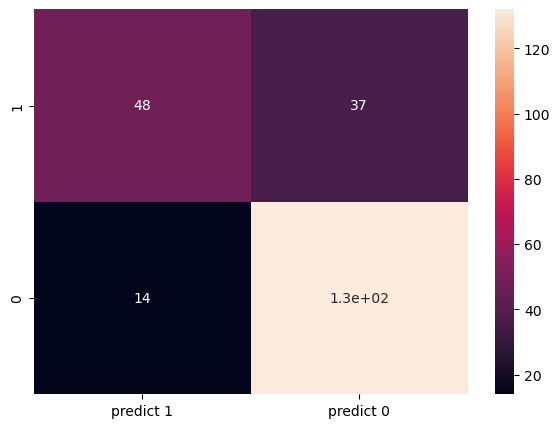

In [96]:
#build confusion matrix
cm =metrics.confusion_matrix(y_test, y_predict, labels=[1,0])

df_cm =pd.DataFrame(cm, index = [i for i in ["1", "0"]],
                        columns =[i for i in ["predict 1", "predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)

## classification report

In [95]:
from sklearn.metrics import classification_report
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.77      0.56      0.65        85
           0       0.78      0.90      0.84       146

    accuracy                           0.78       231
   macro avg       0.78      0.73      0.75       231
weighted avg       0.78      0.78      0.77       231

